# Packages & données

In [3]:
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from extract import extract
from tqdm import tqdm
import os
from skimage import io
from skimage.morphology import skeletonize
import sknw
import random
import napari
import pandas as pd

C:\App\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [8]:
image = io.imread("../notebooks/squelette.tif")

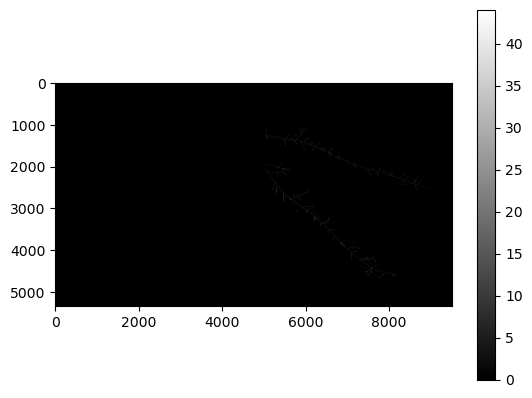

In [10]:
img = image[:, :]

plt.imshow(img, cmap="grey")
plt.colorbar()

plt.show()

In [13]:
skeleton = skeletonize(img)

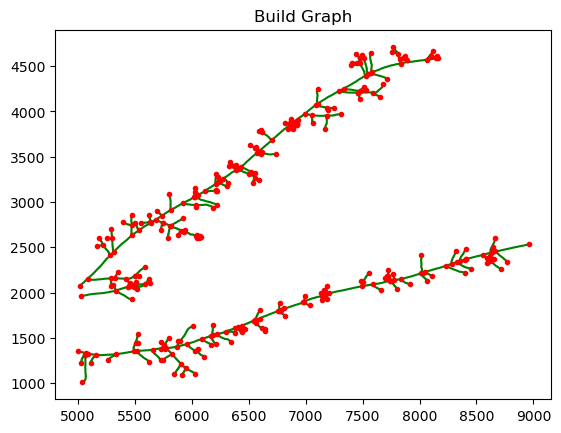

<Figure size 640x480 with 0 Axes>

In [16]:
# build graph from skeleton
graph = sknw.build_sknw(skeleton)

# draw edges by pts
for (s,e) in graph.edges():
    ps = graph[s][e]['pts']
    plt.plot(ps[:,1], ps[:,0], 'green')
    
# draw node by o
nodes = graph.nodes()
ps = np.array([nodes[i]['o'] for i in nodes])
plt.plot(ps[:,1], ps[:,0], 'r.')

# title and show
plt.title('Build Graph')
plt.show()
plt.savefig("graph_1")

# Choisir et cropper les images

In [14]:
# Rhizophagus mesure 3
image_path = []

base_path = "../data"
sp_target = "rhizophagus"
mesure_target = "3"

sp_path = os.path.join(base_path, sp_target)

if os.path.isdir(sp_path):
    for boite in os.listdir(sp_path):
        mesure_path = os.path.join(sp_path, boite, mesure_target)
        if os.path.isdir(mesure_path):
            for photo in os.listdir(mesure_path):
                if photo.endswith(".JPG"):
                    path = os.path.join(mesure_path, photo)
                    image_path.append(path)

# Sélection aléatoire de 5 fichiers
selected_images_rhizo = random.sample(image_path, min(5, len(image_path)))

print(selected_images_rhizo)

['../data\\rhizophagus\\06\\3\\R06_30_06_P09.JPG', '../data\\rhizophagus\\08\\3\\R08_23_06_P09.JPG', '../data\\rhizophagus\\08\\3\\R08_23_06_P02.JPG', '../data\\rhizophagus\\25\\3\\R25_07_07_P20.JPG', '../data\\rhizophagus\\04\\3\\R04_14_07_P14.JPG']


In [15]:
# Gigaspora mesure 5
image_path = []

base_path = "../data"
sp_target = "gigaspora"
mesure_target = "5"

sp_path = os.path.join(base_path, sp_target)

if os.path.isdir(sp_path):
    for boite in os.listdir(sp_path):
        mesure_path = os.path.join(sp_path, boite, mesure_target)
        if os.path.isdir(mesure_path):
            for photo in os.listdir(mesure_path):
                if photo.endswith(".JPG"):
                    path = os.path.join(mesure_path, photo)
                    image_path.append(path)

# Sélection aléatoire de 5 fichiers
selected_images_giga = random.sample(image_path, min(5, len(image_path)))

print(selected_images_giga)

['../data\\gigaspora\\34\\5\\G09_07_07_P13.JPG', '../data\\gigaspora\\34\\5\\G09_07_07_P12.JPG', '../data\\gigaspora\\34\\5\\G09_07_07_P02.JPG', '../data\\gigaspora\\34\\5\\G09_07_07_P16.JPG', '../data\\gigaspora\\34\\5\\G09_07_07_P04.JPG']


In [16]:
from PIL import Image

output_dir = "../data/cropped"
os.makedirs(output_dir, exist_ok=True)

crop_width = 4752
crop_height = 2672

for input_path in selected_images_rhizo:
    with Image.open(input_path) as img:
        cropped = img.crop((0, 0, crop_width, crop_height))

        filename = os.path.basename(input_path)
        output_path = os.path.join(output_dir, filename)

        cropped.save(output_path)
        print(f"Image cropée : {output_path}")

Image cropée : ../data/cropped\R06_30_06_P09.JPG
Image cropée : ../data/cropped\R08_23_06_P09.JPG
Image cropée : ../data/cropped\R08_23_06_P02.JPG
Image cropée : ../data/cropped\R25_07_07_P20.JPG
Image cropée : ../data/cropped\R04_14_07_P14.JPG


In [17]:
output_dir = "../data/cropped"
os.makedirs(output_dir, exist_ok=True)

crop_width = 4752
crop_height = 2672

for input_path in selected_images_giga:
    with Image.open(input_path) as img:
        cropped = img.crop((0, 0, crop_width, crop_height))
        
        filename = os.path.basename(input_path)
        output_path = os.path.join(output_dir, filename)

        cropped.save(output_path)
        print(f"Image cropée : {output_path}")

Image cropée : ../data/cropped\G09_07_07_P13.JPG
Image cropée : ../data/cropped\G09_07_07_P12.JPG
Image cropée : ../data/cropped\G09_07_07_P02.JPG
Image cropée : ../data/cropped\G09_07_07_P16.JPG
Image cropée : ../data/cropped\G09_07_07_P04.JPG


# Afficher les images dans Napari

In [4]:
cropped_dir = "../cropped"

viewer = napari.Viewer()

for filename in os.listdir(cropped_dir):
    if filename.endswith(".JPG"):
        path = os.path.join(cropped_dir, filename)

        image = io.imread(path)
        img = image[:, :, 1]

        viewer.add_image(img, name=filename)

        print(f"Affichage de : {path}")

napari.run()

Affichage de : ../cropped\G09_07_07_P02.JPG
Affichage de : ../cropped\G09_07_07_P04.JPG
Affichage de : ../cropped\G09_07_07_P12.JPG
Affichage de : ../cropped\G09_07_07_P13.JPG
Affichage de : ../cropped\G09_07_07_P16.JPG
Affichage de : ../cropped\R04_14_07_P14.JPG
Affichage de : ../cropped\R06_30_06_P09.JPG
Affichage de : ../cropped\R08_23_06_P02.JPG
Affichage de : ../cropped\R08_23_06_P09.JPG
Affichage de : ../cropped\R25_07_07_P20.JPG


In [4]:
image = io.imread("../tests/cropped/R06_3006_09_sk.tif")

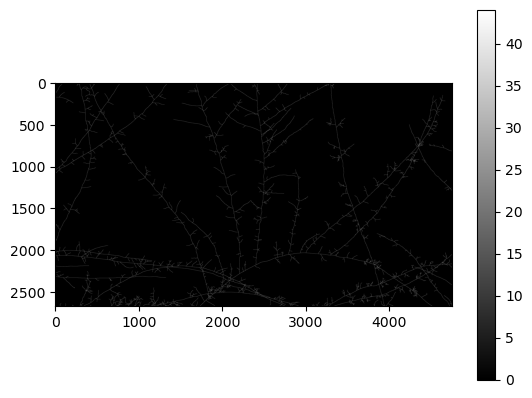

In [5]:
img = image[:, :]

plt.imshow(img, cmap="grey")
plt.colorbar()

plt.show()

In [6]:
skeleton = skeletonize(img)

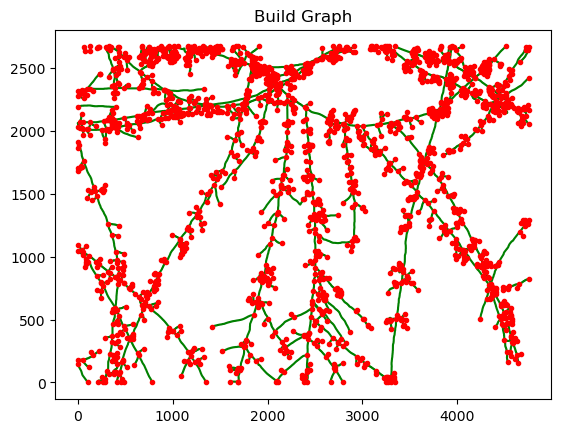

In [7]:
# build graph from skeleton
graph = sknw.build_sknw(skeleton)

# draw edges by pts
for (s,e) in graph.edges():
    ps = graph[s][e]['pts']
    plt.plot(ps[:,1], ps[:,0], 'green')
    
# draw node by o
nodes = graph.nodes()
ps = np.array([nodes[i]['o'] for i in nodes])
plt.plot(ps[:,1], ps[:,0], 'r.')

# title and show
plt.title('Build Graph')
plt.show()

# Extraire les réseaux

## Photos croppées

In [9]:
image_path = []

for photo in os.listdir(os.path.join("../tests/cropped")):
    if photo.endswith("JPG") :
        path = os.path.join("../tests/cropped", photo)
        image_path.append(path)

In [10]:
for photo in tqdm(image_path) : 
    save_dir = os.path.dirname(photo)
    graph_name = os.path.splitext(os.path.basename(photo))[0]
    graph_path = os.path.join(save_dir, f"{graph_name}.pkl" )

    if os.path.exists(graph_path) :
        continue
    
    G = extract(photo)
    if G is None or G.number_of_nodes() == 0 or G.number_of_edges() == 0:
        print(f"Graphe vide ou sans arêtes : {photo}")
        continue

    with open(graph_path, "wb") as f :
        pickle.dump(G, f)

 40%|█████████████████████████████████▏                                                 | 4/10 [04:03<06:39, 66.50s/it]

Graphe vide ou sans arêtes : ../cropped\G09_07_07_P13.JPG


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [11:49<00:00, 71.00s/it]


## Network des images tracées à la main

In [15]:
sk_path = []

for sk in os.listdir(os.path.join("../tests/cropped")):
    if sk.endswith(".tif") :
        path = os.path.join("../tests/cropped", sk)
        sk_path.append(path)

In [16]:
sk_path

['../cropped\\G09_07_07_P02_sk.tif',
 '../cropped\\G09_07_07_P04_sk.tif',
 '../cropped\\G09_07_07_P12_sk.tif',
 '../cropped\\G09_07_07_P13_sk.tif',
 '../cropped\\G09_07_07_P16_sk.tif',
 '../cropped\\R04_14_07_P14_sk.tif',
 '../cropped\\R06_30_06_P09_sk.tif',
 '../cropped\\R08_23_06_P02_sk.tif',
 '../cropped\\R08_23_06_P09_sk.tif',
 '../cropped\\R25_07_07_P20_sk.tif']

In [17]:
for sk in tqdm(sk_path) :
    save_dir = os.path.dirname(sk)
    graph_name = os.path.splitext(os.path.basename(sk))[0]
    graph_path = os.path.join(save_dir, f"{graph_name}.pkl" )

    if os.path.exists(graph_path) :
        continue

    image = io.imread(sk)
    img = image[:, :]
    skeleton = skeletonize(img)
    G = sknw.build_sknw(skeleton)

    if G is None or G.number_of_nodes() == 0 or G.number_of_edges() == 0:
        print(f"Graphe vide ou sans arêtes : {sk}")
        continue

    with open(graph_path, "wb") as f :
        pickle.dump(G, f)

 30%|████████████████████████▉                                                          | 3/10 [00:02<00:05,  1.29it/s]

Graphe vide ou sans arêtes : ../cropped\G09_07_07_P12_sk.tif


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:10<00:00,  1.06s/it]


## Nettoyage des graphes

In [18]:
network_path = []

for network in os.listdir(os.path.join("../tests/cropped")):
    if network.endswith("pkl") :
        path = os.path.join("../tests/cropped", network)
        network_path.append(path)

In [20]:
def simple_graph(G):
    """
    Simplifies a graph by contracting paths of degree-2 nodes into single edges.
    The new edge's weight is the sum of the weights of the replaced edges.
 
    Parameters:
    G (networkx.Graph): Input graph with edge weights stored as "weight" attributes.
 
    Returns:
    networkx.Graph: Simplified graph.
    """
    # Identify nodes with degree ≠ 2
    main_nodes = {n for n in G.nodes if G.degree[n] != 2}
 
    # Subgraph of degree-2 nodes
    deg2_subgraph = G.subgraph(set(G.nodes) - main_nodes)
 
    # Find connected components of the degree-2 subgraph
    components = list(nx.connected_components(deg2_subgraph))
 
    # Create new edges connecting the endpoints of each component, summing their weights
    new_edges = []
    for component in components:
        component = set(component)  # Convert to set for fast lookup
        endpoints = set()
        total_weight = 0
 
        # Track visited edges to avoid double counting
        visited_edges = set()
 
        for node in component:
            for neighbor in G.neighbors(node):
                edge = tuple(sorted((node, neighbor)))  # Avoid direction issues
                if edge not in visited_edges:
                    weight = G[node][neighbor].get("weight", 1)  # Default weight = 1 if missing
                    total_weight += weight  # Sum each edge only once
                    visited_edges.add(edge)
 
                if neighbor not in component:
                    endpoints.add(neighbor)
 
        # Keep only neighbors that are not in the component (endpoints)
        endpoints = list(endpoints)
        if len(endpoints) == 2:  # Valid edge case
            new_edges.append((endpoints[0], endpoints[1], total_weight))
 
    # Construct the simplified graph
    H = G.copy()
    H.remove_nodes_from(deg2_subgraph.nodes)
    H.add_edges_from((u, v, {"weight": w}) for u, v, w in new_edges)
 
    return H

In [21]:
for path in tqdm(network_path) :
    save_dir = os.path.dirname(path)
    graph_name = os.path.splitext(os.path.basename(path))[0]
    graph_path = os.path.join(save_dir, f"{graph_name}.pklclean" )

    if os.path.exists(graph_path) :
        continue
    
    G = pickle.load(open(path, 'rb'))
    G.remove_edges_from(nx.selfloop_edges(G))
    to_remove = [(u, v) for u, v, d in G.edges(data=True) if d.get('weight', 0) < 25 and (G.degree[u] == 1 or G.degree[v] == 1)]
    G.remove_edges_from(to_remove)
    G_cc = sorted(nx.connected_components(G), key = len, reverse = True)
    G_sub = G.subgraph(G_cc[0])
    G_simple = simple_graph(G_sub)
    for n in G_simple.nodes:
        if 'pts' not in G_simple.nodes[n] and 'pts' in G_sub.nodes[n]:
            G_simple.nodes[n]['pts'] = G_sub.nodes[n]['pts']

    for n in G_simple.nodes:
        pts = np.array(G_simple.nodes[n]["pts"])
        if pts.ndim == 2 and pts.shape[1] == 2:
            pts = np.mean(pts, axis=0)
        elif pts.ndim != 1 or pts.shape[0] != 2:
            raise ValueError(f"Node {n} has unsupported shape {pts.shape}")
        G_simple.nodes[n]["pts"] = tuple(pts)
    
    with open(graph_path, "wb") as f :
        pickle.dump(G_simple, f)

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:03<00:00,  6.00it/s]


## Tout afficher dans Napari

In [2]:
cropped_dir = "../tests/cropped"

viewer = napari.Viewer()

for filename in os.listdir(cropped_dir):
    if filename.endswith(".JPG"):
        path = os.path.join(cropped_dir, filename)

        image = io.imread(path)
        img = image[:, :, 1]

        viewer.add_image(img, name=filename)

        print(f"Affichage de : {path}")

    if filename.endswith("sk.pklclean") : 
        path = os.path.join(cropped_dir, filename)
        G = pickle.load(open(path, 'rb'))

        # pts = {n : G.nodes[n]["pts"] for n in G.nodes }
        # pts = {n : (y, -x) for n, (x, y) in pts.items()}
        
        points_G = np.array([G.nodes[n]['pts'] for n in G.nodes])

        edges_G = []
        for u, v in G.edges():
            pt_u = G.nodes[u]['pts']
            pt_v = G.nodes[v]['pts']
            edges_G.append([pt_u, pt_v])
        edges_G = np.array(edges_G)

        viewer.add_points(points_G, name=filename, size=10, face_color="blue", border_color="gray")
        viewer.add_shapes(edges_G, shape_type="line", edge_color="white", edge_width=1, name=filename)

        print(f"Affichage de : {path}")

    if filename.endswith(".pklclean") and "sk" not in filename.lower():
        path = os.path.join(cropped_dir, filename)
        G = pickle.load(open(path, 'rb'))

        # pts = {n : G.nodes[n]["pts"] for n in G.nodes }
        # pts = {n : (y, -x) for n, (x, y) in pts.items()}
        
        points_G = np.array([G.nodes[n]['pts'] for n in G.nodes])

        edges_G = []
        for u, v in G.edges():
            pt_u = G.nodes[u]['pts']
            pt_v = G.nodes[v]['pts']
            edges_G.append([pt_u, pt_v])
        edges_G = np.array(edges_G)

        viewer.add_points(points_G, name=filename, size=10, face_color="yellow", border_color="gray")
        viewer.add_shapes(edges_G, shape_type="line", edge_color="lime", edge_width=1, name=filename)

        print(f"Affichage de : {path}")

napari.run()

Affichage de : ../tests/cropped\G09_07_07_P02.JPG
Affichage de : ../tests/cropped\G09_07_07_P02.pklclean
Affichage de : ../tests/cropped\G09_07_07_P02_sk.pklclean
Affichage de : ../tests/cropped\G09_07_07_P04.JPG
Affichage de : ../tests/cropped\G09_07_07_P04.pklclean
Affichage de : ../tests/cropped\G09_07_07_P04_sk.pklclean
Affichage de : ../tests/cropped\G09_07_07_P12.JPG
Affichage de : ../tests/cropped\G09_07_07_P12.pklclean
Affichage de : ../tests/cropped\G09_07_07_P13.JPG
Affichage de : ../tests/cropped\G09_07_07_P13_sk.pklclean
Affichage de : ../tests/cropped\G09_07_07_P16.JPG
Affichage de : ../tests/cropped\G09_07_07_P16.pklclean
Affichage de : ../tests/cropped\G09_07_07_P16_sk.pklclean
Affichage de : ../tests/cropped\R04_14_07_P14.JPG
Affichage de : ../tests/cropped\R04_14_07_P14.pklclean
Affichage de : ../tests/cropped\R04_14_07_P14_sk.pklclean
Affichage de : ../tests/cropped\R06_30_06_P09.JPG
Affichage de : ../tests/cropped\R06_30_06_P09.pklclean
Affichage de : ../tests/croppe

# Analyse mesures de base

In [4]:
cropped_dir = "../tests/cropped"

In [17]:
from shapely import convex_hull
from shapely import MultiPoint

In [18]:
def total_hyphal_length(G, weight="weight"):
    """Compute the total hyphal length in the network.
 
    If edges have a 'length' attribute, sum those. Otherwise, compute Euclidean distance.
    """
    total_length = 0.0
 
    for u, v, data in G.edges(data=True):
        if weight in data:
            total_length += data[weight]
        elif "pts" in G.nodes[u] and "pts" in G.nodes[v]:
            pos_u = np.array(G.nodes[u]["pts"])
            pos_v = np.array(G.nodes[v]["pts"])
            total_length += np.linalg.norm(pos_u - pos_v)
        else:
            raise ValueError("Edge length missing and node positions unavailable.")
 
    return total_length

In [19]:
def cycle_density(G):
    """
    Calculates the cycle density: number of independent cycles divided
    by the number of nodes or edges.
 
    Parameters
    ----------
    G : networkx.Graph
        The graph with node positions stored as the "pos" attribute.
 
    Returns
    -------
    float
        Cycle density
    """
    num_cycles = len(list(nx.cycle_basis(G)))
    thl = total_hyphal_length(G, weight="weight")
    return num_cycles / thl

In [20]:
def spatial_density(G) :
    hyphal_length = total_hyphal_length(G)
    node_positions = {n : G.nodes[n]["pts"] for n in G.nodes } # ajouter [0] si liste de listes 
    node_positions = [tuple(pts) for pts in node_positions.values()]
    area = convex_hull(MultiPoint(node_positions)).area
    spatial_density = hyphal_length/area
    return spatial_density

In [21]:
def global_efficiency_weighted(G, weight="weight"):

    """

    compute the global efficiency of a weighted graph.
 
    Parameters

    ----------

    G : networkx.Graph

        graph where edges may have weights representing distances or costs.

    weight : str, optional

        name of the edge attribute to use as weight (default is "weight").
 
    Returns

    -------

    g_eff : float

        global efficiency of the graph, defined as the average of the 

        inverse shortest path lengths between all pairs of nodes.

    """
 
    # adapted from networkx to take weights into account
 
    N = len(G)

    n_paths = N * (N - 1)  # total number of ordered node pairs
 
    if N > 5000:

        print("too large:", G)

        return np.nan, np.nan
 
    if n_paths == 0 :

        return 0, 0
 
    node_pos = {n : np.array(G.nodes[n]["pts"]) for n in G.nodes}
 
    g_eff = 0

    average_length = 0

    g_eff_euclid = 0
 
    lengths = nx.all_pairs_dijkstra_path_length(G, weight=weight, backend="parallel")  # compute shortest paths

    for source, targets in lengths:

        for target, length_sp in targets.items():

            if length_sp > 0:  # avoid self-loops

                g_eff += 1 / length_sp

                average_length += length_sp 
 
                length_euclid = np.linalg.norm(node_pos[target] - node_pos[source])

                g_eff_euclid += 1 / length_euclid
 
    g_eff /= n_paths

    g_eff_euclid /= n_paths

    average_length /= n_paths
 
    return g_eff if g_eff==0 else g_eff / g_eff_euclid, average_length

In [22]:
def local_efficiency_weighted(G):

    """Returns the average local efficiency of the graph.
 
    The *efficiency* of a pair of nodes in a graph is the multiplicative

    inverse of the shortest path distance between the nodes. The *local

    efficiency* of a node in the graph is the average global efficiency of the

    subgraph induced by the neighbors of the node. The *average local

    efficiency* is the average of the local efficiencies of each node [1]_.
 
    Parameters

    ----------

    G : :class:`networkx.Graph`

        An undirected graph for which to compute the average local efficiency.
 
    Returns

    -------

    float

        The average local efficiency of the graph.
 
    Examples

    --------
>>> G = nx.Graph([(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)])
>>> nx.local_efficiency(G)

    0.9166666666666667
 
    Notes

    -----

    Edge weights are ignored when computing the shortest path distances.
 
    See also

    --------

    global_efficiency
 
    References

    ----------

    .. [1] Latora, Vito, and Massimo Marchiori.

           "Efficient behavior of small-world networks."

           *Physical Review Letters* 87.19 (2001): 198701.
<https://doi.org/10.1103/PhysRevLett.87.198701>
 
    """

    N = len(G)

    efficiency = (global_efficiency_weighted(G.subgraph(G[v])) for v in G)

    efficiency_list, _ = zip(*efficiency)

    return sum(efficiency_list) / N

In [23]:
def robustness_curve(G, root_node=0, n_steps=20, mode="uniform", seed=None, n_reps=10, max_fraction_rm=1):

    """

    Compute robustness curve: percentage of total network length

    connected to root node as a function of fraction of edge length removed.

    Averaged over multiple repetitions.
 
    Parameters:

        G : networkx.Graph

            The input graph with edge attribute 'weight'.

        root_node : node label

            The node considered as the root.

        n_steps : int

            Number of removal steps between 0 and 1.

        mode : str

            'uniform' (default) or 'length_weighted' for removal probability.

        seed : int or None

            Random seed for reproducibility.

        n_reps : int

            Number of repetitions to average over.
 
    Returns:

        fractions_removed : np.ndarray

        fractions_connected_mean : np.ndarray

    """
 
    rng = np.random.seed(seed)
 
    edges = list(G.edges(data=True))

    weights = np.array([attr['weight'] for (_, _, attr) in edges])

    total_length = weights.sum()
 
    fractions_removed = np.linspace(0, max_fraction_rm, n_steps)

    all_fractions_connected = []
 
    for _ in range(n_reps):

        fractions_connected = []
 
        for fraction in fractions_removed:

            G_copy = G.copy()
 
            n_edges_to_remove = int(fraction * len(edges))
 
            if n_edges_to_remove > 0:

                if mode == "uniform":

                    selected_indices = np.random.choice(len(edges), size=n_edges_to_remove, replace=False)

                elif mode == "length_weighted":

                    probabilities = weights / weights.sum()

                    selected_indices =  np.random.choice(len(edges), size=n_edges_to_remove, replace=False, p=probabilities)

                else:

                    raise ValueError("Unknown mode: choose 'uniform' or 'length_weighted'")
 
                edges_to_remove = [edges[i][:2] for i in selected_indices]

                G_copy.remove_edges_from(edges_to_remove)
 
            # Get connected component containing root node

            if root_node in G_copy:

                components = nx.node_connected_component(G_copy, root_node)

                subgraph = G_copy.subgraph(components)

                connected_length = sum(nx.get_edge_attributes(subgraph, 'weight').values())

            else:

                connected_length = 0.0
 
            fractions_connected.append(connected_length / total_length)
 
        all_fractions_connected.append(fractions_connected)
 
    fractions_connected_mean = np.mean(all_fractions_connected, axis=0)
 
    return fractions_removed, fractions_connected_mean
 
 
def robustness_score(fractions_removed, fractions_connected, mode="auc", target_fraction=0.5):

    """

    Summarize a robustness curve into a single number.
 
    Parameters:

        fractions_removed : np.ndarray

        fractions_connected : np.ndarray

        mode : str

            'auc' (default) to compute area under the curve (normalized),

            or 'target_fraction' to find the fraction removed when

            connected component drops below target_fraction.

        target_fraction : float

            Target fraction for 'target_fraction' mode (default 0.5).
 
    Returns:

        summary_value : float

    """

    if mode == "auc":

        auc = np.trapz(fractions_connected, fractions_removed)

        max_auc = 1.0 * 1.0  # maximum area = 1*1

        return auc / max_auc
 
    elif mode == "target_fraction":

        below_target = fractions_connected <= target_fraction

        if np.any(below_target):

            idx = np.argmax(below_target)

            return fractions_removed[idx]

        else:

            return 1.0  # never dropped below target, very robust
 
    else:

        raise ValueError("Unknown mode: choose 'auc' or 'target_fraction'")
 

In [24]:
metrics_functions = {
    'nodes' : nx.number_of_nodes,
    'edges' : nx.number_of_edges,
    'total hyphal length' : total_hyphal_length,
    'cycle density' : cycle_density,
    'spatial density' : spatial_density,
    'gew' : global_efficiency_weighted,
    'lew' : local_efficiency_weighted,
    'robustness' : robustness_curve
}

In [25]:
results = []

for network in os.listdir("C:/Users/Renée/Documents/Memoire/Masters_thesis/tests/cropped"):
    if network.endswith(".pklclean") :
        path = os.path.join("C:/Users/Renée/Documents/Memoire/Masters_thesis/tests/cropped", network)
        G = pickle.load(open(path, 'rb'))

        result = {
            "network": network
        }

        for metric_name, func in metrics_functions.items():
            result[metric_name] = func(G)
 
        results.append(result)

In [26]:
results

[{'network': 'G09_07_07_P02.pklclean',
  'nodes': 251,
  'edges': 268,
  'total hyphal length': 40552.16402671092,
  'cycle density': 0.00044387273606764243,
  'spatial density': 0.0039644417474470305,
  'gew': (0.7467303181582154, 2650.8576677767887),
  'lew': 0.025401648518411528,
  'robustness': (array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
          0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
          0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
          0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
   array([1.00000000e+00, 5.50115682e-01, 5.25687529e-01, 1.79883122e-01,
          1.14449634e-01, 1.20475505e-02, 9.62571688e-03, 1.67395717e-02,
          8.82597812e-03, 6.58053170e-03, 6.78837096e-03, 6.57588015e-03,
          3.50013242e-03, 5.28730196e-03, 1.92889727e-03, 5.77626438e-03,
          8.07211697e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]))},
 {'network': 'G09_07_07_P02_sk.pklclean',
  'n

In [46]:
data = pd.DataFrame(results)

In [47]:
data

,network,nodes,edges,total hyphal length,cycle density,spatial density,gew,lew,robustness
0,G09_07_07_P02.pklclean,251,268,40552.164027,0.000444,0.003964,"(0.7467303181582154, 2650.8576677767887)",0.025402,"([0.0, 0.05263157894736842, 0.1052631578947368..."
1,G09_07_07_P02_sk.pklclean,162,179,37163.638232,0.000484,0.003423,"(0.7667642512609657, 2948.6382225417346)",0.120391,"([0.0, 0.05263157894736842, 0.1052631578947368..."
2,G09_07_07_P04.pklclean,98,101,10688.267533,0.000374,0.003746,"(0.7198402041895825, 1353.784561420424)",0.053022,"([0.0, 0.05263157894736842, 0.1052631578947368..."
3,G09_07_07_P04_sk.pklclean,121,127,31669.820596,0.000221,0.003626,"(0.6207589352989088, 2699.158784935769)",0.071316,"([0.0, 0.05263157894736842, 0.1052631578947368..."
4,G09_07_07_P12.pklclean,99,125,9671.369480,0.002792,0.014885,"(0.7645326942424614, 1163.029613162862)",0.396940,"([0.0, 0.05263157894736842, 0.1052631578947368..."
5,G09_07_07_P13_sk.pklclean,4,3,1030.930158,0.000000,0.020278,"(0.8925035786747354, 515.4650788387054)",0.000000,"([0.0, 0.05263157894736842, 0.1052631578947368..."
6,G09_07_07_P16.pklclean,45,49,4706.715583,0.001062,0.007838,"(0.745303757296581, 1000.2866641253164)",0.226249,"([0.0, 0.05263157894736842, 0.1052631578947368..."
7,G09_07_07_P16_sk.pklclean,43,44,15761.165101,0.000127,0.002704,"(0.8000513919700557, 2139.5512856052724)",0.065407,"([0.0, 0.05263157894736842, 0.1052631578947368..."
8,R04_14_07_P14.pklclean,802,949,56371.415575,0.002625,0.007015,"(0.6552348691294831, 2487.0442894823673)",0.130834,"([0.0, 0.05263157894736842, 0.1052631578947368..."
9,R04_14_07_P14_sk.pklclean,192,202,17683.574079,0.000622,0.005621,"(0.6755211402937659, 1642.0326550590064)",0.063061,"([0.0, 0.05263157894736842, 0.1052631578947368..."


In [31]:
ratio_mean = 255.67

In [32]:
data["total hyphal length"] = data["total hyphal length"] / ratio_mean

In [33]:
data["spatial density"] = data["spatial density"] * ratio_mean

In [34]:
data["cycle density"] = data["cycle density"] * ratio_mean

In [52]:
data[["gew", "asp"]] = pd.DataFrame(data["gew"].tolist(), index=data.index)

In [53]:
data["robustness"] = (
    data["robustness"]
    .astype(str)
    .str.replace("\n", "", regex=False)
    .str.replace(r"\s+", " ", regex=True)
)

In [54]:
import ast

In [55]:
data[["fractions removed", 
         "fractions connected mean"]] = data["robustness"].str.extract(
    r'\(array\(\s*(\[.*?\])\s*\),\s*array\(\s*(\[.*?\])\s*\)\)'
)

data["fractions removed"] = data["fractions removed"].apply(
    lambda x: np.array(ast.literal_eval(x))
)

data["fractions connected mean"] = data["fractions connected mean"].apply(
    lambda x: np.array(ast.literal_eval(x))
)

In [56]:
data["robustness score"] = data.apply(
    lambda row: robustness_score(row["fractions removed"], row["fractions connected mean"]),
    axis=1
)

In [58]:
data["asp"] = data["asp"] / ratio_mean

In [60]:
data.to_excel('extraction_manuelle.xlsx', index=False)

# Erreur entre l'extraction automatique et manuelle

In [3]:
os.chdir("C:/Users/Renée/Documents/Memoire/Masters_thesis/results/excel") 

In [4]:
data = pd.read_excel('extraction_tableau.xlsx')

In [5]:
data_erreur = data.dropna()

In [6]:
data_erreur

,Index,Image,Espèce,Extraction,Nœuds,Liens,Longueur hyphale [mm],Longueur hyphale [px],error_value,error_type
0,1,G09_07_07_P02.pklclean,Gigaspora sp.,Automatique,251,268,158.611351,40552.164027,54.938272,nodes
2,2,G09_07_07_P04.pklclean,Gigaspora sp.,Automatique,98,101,41.804934,10688.267533,-19.008264,nodes
4,3,G09_07_07_P12.pklclean,Gigaspora sp.,Automatique,99,125,37.827549,9671.369480,100.000000,nodes
6,4,G09_07_07_P13.pklclean,Gigaspora sp.,Automatique,0,0,0.000000,0.000000,-100.000000,nodes
8,5,G09_07_07_P16.pklclean,Gigaspora sp.,Automatique,45,49,18.409339,4706.715583,4.651163,nodes
10,6,R04_14_07_P14.pklclean,R. irregularis,Automatique,802,949,220.485061,56371.415575,317.708333,nodes
12,7,R06_30_06_P09.pklclean,R. irregularis,Automatique,1316,1481,328.606274,84014.766077,-10.293115,nodes
14,8,R08_23_06_P02.pklclean,R. irregularis,Automatique,603,662,160.034070,40915.910554,18.003914,nodes
16,9,R08_23_06_P09.pklclean,R. irregularis,Automatique,950,1097,250.309777,63996.700683,-0.938478,nodes
18,10,R25_07_07_P20.pklclean,R. irregularis,Automatique,20,22,8.708811,2226.581646,-79.381443,nodes


In [70]:
sns.set_theme(style="whitegrid", context="paper", palette="pastel")

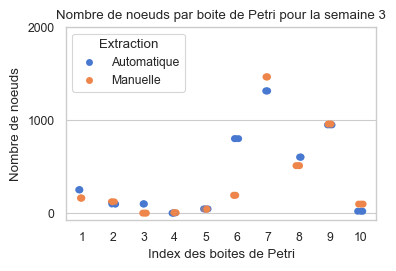

In [7]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.stripplot(x="Index", y="Nœuds", hue="Extraction", data=data, 
              palette="muted", legend=True)

ax.set_title("Nombre de noeuds par boite de Petri pour la semaine 3")
ax.set_ylabel("Nombre de noeuds")
ax.set_xlabel("Index des boites de Petri")
ax.set_yticks([0, 1000, 2000])

# fig.savefig("nodes_w3", dpi=250, bbox_inches="tight", pad_inches=0.1)

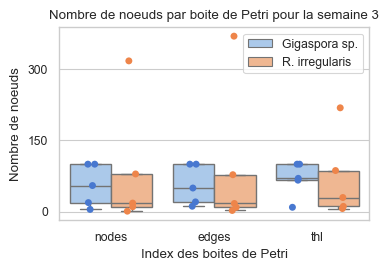

In [38]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.boxplot(x="error_type", y="error_value", data=data_erreur, 
            palette="pastel", hue="Espèce", showfliers=False)

sns.stripplot(x="error_type", y="error_value", hue="Espèce", data=data_erreur, 
              palette="muted", dodge=True, legend=False)

ax.legend(loc="best")

ax.set_title("Nombre de noeuds par boite de Petri pour la semaine 3")
ax.set_ylabel("Nombre de noeuds")
ax.set_xlabel("Index des boites de Petri")
ax.set_yticks([0, 150, 300])

# fig.savefig("nodes_w3", dpi=250, bbox_inches="tight", pad_inches=0.1)

C:\Users\Renée\AppData\Local\Temp\ipykernel_14216\174068165.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(["# Noeuds", "# Liens", "Longueur hyphale"])


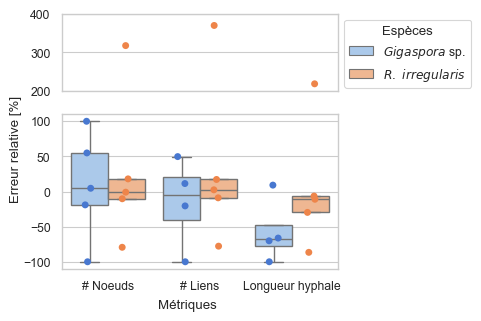

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2,
                             sharex=True, figsize=(4, 3),
                              height_ratios=[0.5, 1])

ax1 = sns.boxplot(x="error_type", y="error_value", data=data_erreur, 
            palette="pastel", hue="Espèce", showfliers=False, ax=ax1)

sns.stripplot(x="error_type", y="error_value", data=data_erreur, 
              palette="muted", hue="Espèce", dodge=True, legend=False, ax=ax1)

ax2 = sns.boxplot(x="error_type", y="error_value", data=data_erreur, 
            palette="pastel", hue="Espèce", showfliers=False, ax=ax2)

sns.stripplot(x="error_type", y="error_value", data=data_erreur, 
              palette="muted", hue="Espèce", dodge=True, legend=False, ax=ax2)

ax1.set_ylim(200, 400)
ax2.set_ylim(-110, 110)

ax1.get_xaxis().set_visible(False)

ax1.set_ylabel("")
ax2.set_ylabel("")
ax2.set_xlabel("")

ax2.set_xticklabels(["# Noeuds", "# Liens", "Longueur hyphale"])

fig.text(0.03, 0.55, "Erreur relative [%]", va="center", rotation="vertical")
fig.text(0.40, 0.03, "Métriques", va="center", rotation="horizontal")

ax2.get_legend().remove()

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(title="Espèces", handles=handles, labels=[r"$\it{Gigaspora}$ sp.", r"$\it{R.\ irregularis}$"],
          bbox_to_anchor=(1, 1), loc="upper left")

ax1.set_yticks([200, 300, 400])
ax2.set_yticks([-100, -50, 0, 50, 100])

# ax1.set_title("Pourcentage d'erreur relative de l'extraction automatique")

fig.subplots_adjust(left=0.16, right=0.85, bottom=0.15, top=1)

fig.savefig("erreur", dpi=250, bbox_inches="tight", pad_inches=0.1)

In [20]:
data #retirer les lignes en trop

,Index,Image,Espèce,Extraction,Nœuds,Liens,Longueur hyphale [mm],Longueur hyphale [px],error_value,error_type
0,1,G09_07_07_P02.pklclean,Gigaspora sp.,Automatique,251,268,158.611351,40552.164027,54.938272,nodes
1,1,G09_07_07_P02_sk.pklclean,Gigaspora sp.,Manuelle,162,179,145.357837,37163.638232,NaN,nodes
2,2,G09_07_07_P04.pklclean,Gigaspora sp.,Automatique,98,101,41.804934,10688.267533,-19.008264,nodes
3,2,G09_07_07_P04_sk.pklclean,Gigaspora sp.,Manuelle,121,127,123.869913,31669.820596,NaN,nodes
4,3,G09_07_07_P12.pklclean,Gigaspora sp.,Automatique,99,125,37.827549,9671.369480,100.000000,nodes
5,3,G09_07_07_P12_sk.pklclean,Gigaspora sp.,Manuelle,0,0,0.000000,0.000000,NaN,nodes
6,4,G09_07_07_P13.pklclean,Gigaspora sp.,Automatique,0,0,0.000000,0.000000,-100.000000,nodes
7,4,G09_07_07_P13_sk.pklclean,Gigaspora sp.,Manuelle,4,3,4.032269,1030.930158,NaN,nodes
8,5,G09_07_07_P16.pklclean,Gigaspora sp.,Automatique,45,49,18.409339,4706.715583,4.651163,nodes
9,5,G09_07_07_P16_sk.pklclean,Gigaspora sp.,Manuelle,43,44,61.646517,15761.165101,NaN,nodes


In [13]:
from statannotations.Annotator import Annotator

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

R. irregularis_Automatique vs. R. irregularis_Manuelle: Mann-Whitney-Wilcoxon test two-sided, P_val:5.881e-01 U_stat=9.900e+01
Gigaspora sp._Automatique vs. Gigaspora sp._Manuelle: Mann-Whitney-Wilcoxon test two-sided, P_val:7.224e-01 U_stat=1.035e+02


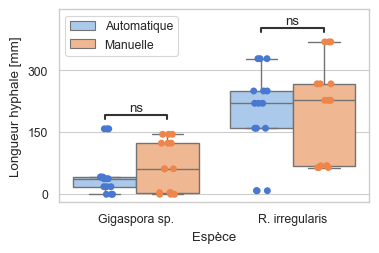

In [19]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.boxplot(x="Espèce", y="Longueur hyphale [mm]", data=data, 
            palette="pastel", hue="Extraction", showfliers=False)

sns.stripplot(x="Espèce", y="Longueur hyphale [mm]", hue="Extraction", data=data, 
              palette="muted", dodge=True, legend=False)

ax.legend(loc="best")

pairs = [
    (("Gigaspora sp.", "Automatique"), ("Gigaspora sp.", "Manuelle")),
    (("R. irregularis", "Automatique"), ("R. irregularis", "Manuelle"))
]

annotator = Annotator(ax, pairs, data=data, x="Espèce", y="Longueur hyphale [mm]", hue="Extraction")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

# ax.set_title("Nombre de noeuds par boite de Petri pour la semaine 3")
# ax.set_ylabel("Nombre de noeuds")
# ax.set_xlabel("Index des boites de Petri")
ax.set_yticks([0, 150, 300])

In [81]:
data = pd.read_excel('extraction_manuelle.xlsx')

In [82]:
data

,Image,Espèce,Extraction,nodes,edges,total hyphal length,cycle density,spatial density,gew,lew,asp,robustness score,error_type,error
0,G09_07_07_P02.pklclean,Gigaspora sp.,Automatique,251,268,40552.164027,0.000444,0.003964,0.746730,0.025402,10.368278,0.102875,cycle density,-8.355968
1,G09_07_07_P04.pklclean,Gigaspora sp.,Automatique,98,101,10688.267533,0.000374,0.003746,0.719840,0.053022,5.295047,0.188177,cycle density,69.316873
2,G09_07_07_P12.pklclean,Gigaspora sp.,Automatique,99,125,9671.369480,0.002792,0.014885,0.764533,0.396940,4.548948,0.000000,cycle density,NaN
3,G09_07_07_P13.pklclean,Gigaspora sp.,Automatique,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,cycle density,NaN
4,G09_07_07_P16.pklclean,Gigaspora sp.,Automatique,45,49,4706.715583,0.001062,0.007838,0.745304,0.226249,3.912413,0.000000,cycle density,737.163667
5,R04_14_07_P14.pklclean,R. irregularis,Automatique,802,949,56371.415575,0.002625,0.007015,0.655235,0.130834,9.727556,0.000000,cycle density,322.065774
6,R06_30_06_P09.pklclean,R. irregularis,Automatique,1316,1481,84014.766077,0.001976,0.006844,0.670693,0.092477,11.729847,0.000000,cycle density,15.863721
7,R08_23_06_P02.pklclean,R. irregularis,Automatique,603,662,40915.910554,0.001466,0.004346,0.668635,0.093754,9.657439,0.000000,cycle density,55.227623
8,R08_23_06_P09.pklclean,R. irregularis,Automatique,950,1097,63996.700683,0.002313,0.010033,0.624712,0.099197,8.961107,0.080812,cycle density,40.049264
9,R25_07_07_P20.pklclean,R. irregularis,Automatique,20,22,2226.581646,0.001347,0.039249,0.849891,0.000000,1.371622,0.000000,cycle density,644.722857


In [83]:
data['error'] = data['error'].replace(0, np.nan)

C:\Users\Renée\AppData\Local\Temp\ipykernel_6488\3052876526.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Densité de cycles", "Densité spatiale", "Efficience globale", "Efficience locale", "Chemin le plus court", "Robustesse"])


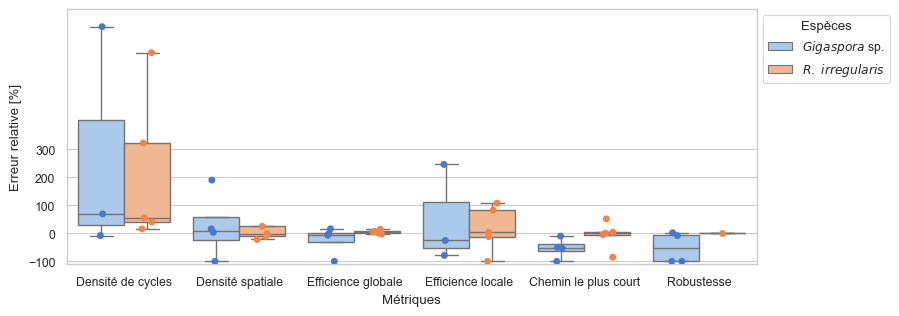

In [86]:
fig, ax = plt.subplots(figsize=(10, 3))

ax = sns.boxplot(x="error_type", y="error", data=data, 
            palette="pastel", hue="Espèce", showfliers=False)

sns.stripplot(x="error_type", y="error", data=data, 
              palette="muted", hue="Espèce", dodge=True, legend=False)
ax.set_ylim([-110, 800])

ax.set_ylabel("Erreur relative [%]")

ax.set_xlabel("Métriques")

ax.set_xticklabels(["Densité de cycles", "Densité spatiale", "Efficience globale", "Efficience locale", "Chemin le plus court", "Robustesse"])

handles, labels = ax1.get_legend_handles_labels()
ax.legend(title="Espèces", handles=handles, labels=[r"$\it{Gigaspora}$ sp.", r"$\it{R.\ irregularis}$"],
          bbox_to_anchor=(1, 1), loc="upper left")

ax.set_yticks([200, 300, -100, 0, 100])

# ax1.set_title("Pourcentage d'erreur relative de l'extraction automatique")

fig.subplots_adjust(left=0.16, right=0.85, bottom=0.15, top=1)

fig.savefig("erreur", dpi=250, bbox_inches="tight", pad_inches=0.1)

C:\Users\Renée\AppData\Local\Temp\ipykernel_6488\1993063610.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(["Densité de cycles", "Densité spatiale", "Efficience globale", "Efficience locale", "Chemin le plus court", "Robustesse"])


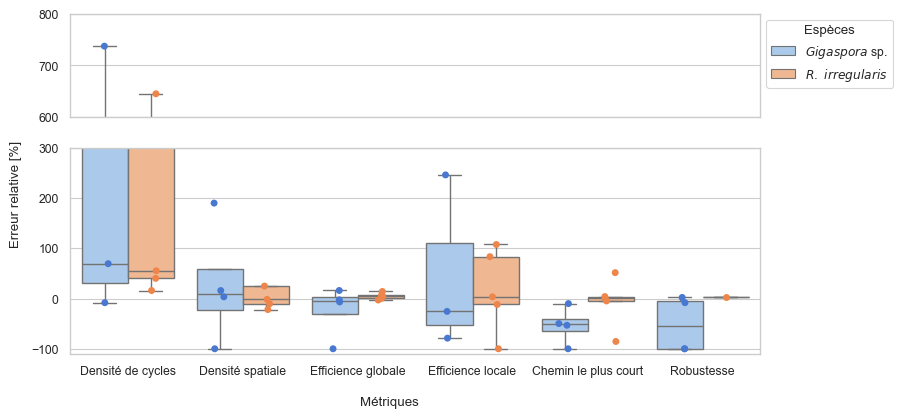

In [89]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2,
                             sharex=True, figsize=(10, 4),
                              height_ratios=[0.5, 1])

ax1 = sns.boxplot(x="error_type", y="error", data=data, 
            palette="pastel", hue="Espèce", showfliers=False, ax=ax1)

sns.stripplot(x="error_type", y="error", data=data, 
              palette="muted", hue="Espèce", dodge=True, legend=False, ax=ax1)

ax2 = sns.boxplot(x="error_type", y="error", data=data, 
            palette="pastel", hue="Espèce", showfliers=False, ax=ax2)

sns.stripplot(x="error_type", y="error", data=data, 
              palette="muted", hue="Espèce", dodge=True, legend=False, ax=ax2)

ax1.set_ylim(600, 800)
ax2.set_ylim(-110, 300)

ax1.get_xaxis().set_visible(False)

ax1.set_ylabel("")
ax2.set_ylabel("")
ax2.set_xlabel("")

ax2.set_xticklabels(["Densité de cycles", "Densité spatiale", "Efficience globale", "Efficience locale", "Chemin le plus court", "Robustesse"])

fig.text(0.1, 0.55, "Erreur relative [%]", va="center", rotation="vertical")
fig.text(0.45, 0.03, "Métriques", va="center", rotation="horizontal")

ax2.get_legend().remove()

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(title="Espèces", handles=handles, labels=[r"$\it{Gigaspora}$ sp.", r"$\it{R.\ irregularis}$"],
          bbox_to_anchor=(1, 1), loc="upper left")

ax1.set_yticks([600, 700, 800])
ax2.set_yticks([-100, 0, 100, 200, 300])

# ax1.set_title("Pourcentage d'erreur relative de l'extraction automatique")

fig.subplots_adjust(left=0.16, right=0.85, bottom=0.15, top=1)

fig.savefig("erreur", dpi=250, bbox_inches="tight", pad_inches=0.1)